In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
path = r'C:\Users\Hoan Dinh\OneDrive\Tài liệu/'
filenames = 'asm2_pandas.csv'
df = pd.read_csv(path + filenames)
df

,ResultID,Date,ProductID,StoreID,Quantity Ordered,Price Each,Address,City
0,1,1/1/2023,101.0,ST01,1.0,700.00,123 Main Street,NYC
1,2,1/2/2023,102.0,ST02,1.0,14.95,456 Elm Avenue,LA
2,3,1/3/2023,103.0,ST03,2.0,11.99,789 Oak Boulevard,Chicago
3,4,1/4/2023,104.0,ST04,1.0,149.99,1000 Pine Drive,Houston
4,5,1/5/2023,105.0,ST05,1.0,11.99,123 Maple Street,Phoenix
...,...,...,...,...,...,...,...,...
366,333,12/27/2023,128.0,ST13,1.0,11.95,123 Maple Street,Denver
367,334,12/28/2023,NaN,ST14,3.0,2.99,456 Oak Avenue,Columbus
368,335,12/29/2023,127.0,ST15,1.0,11.99,789 Elm Boulevard,Fort Worth
369,336,12/30/2023,128.0,ST01,1.0,2.99,1000 Pine Drive,Charlotte


# Clean Data

In [67]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
df

,ResultID,Date,ProductID,StoreID,Quantity Ordered,Price Each,Address,City
0,1,1/1/2023,101.0,ST01,1.0,700.00,123 Main Street,NYC
1,2,1/2/2023,102.0,ST02,1.0,14.95,456 Elm Avenue,LA
2,3,1/3/2023,103.0,ST03,2.0,11.99,789 Oak Boulevard,Chicago
3,4,1/4/2023,104.0,ST04,1.0,149.99,1000 Pine Drive,Houston
4,5,1/5/2023,105.0,ST05,1.0,11.99,123 Maple Street,Phoenix
...,...,...,...,...,...,...,...,...
360,332,12/26/2023,128.0,ST12,1.0,149.99,123 Main Street,Seattle
361,333,12/27/2023,128.0,ST13,1.0,11.95,123 Maple Street,Denver
363,335,12/29/2023,127.0,ST15,1.0,11.99,789 Elm Boulevard,Fort Worth
364,336,12/30/2023,128.0,ST01,1.0,2.99,1000 Pine Drive,Charlotte


1. What was the best month for sales?


In [69]:
df['Sales'] = df['Quantity Ordered'] * df[' Price Each ']

In [8]:
df

,ResultID,Date,ProductID,StoreID,Quantity Ordered,Price Each,Address,City,Sales
0,1,1/1/2023,101.0,ST01,1.0,700.00,123 Main Street,NYC,700.00
1,2,1/2/2023,102.0,ST02,1.0,14.95,456 Elm Avenue,LA,14.95
2,3,1/3/2023,103.0,ST03,2.0,11.99,789 Oak Boulevard,Chicago,23.98
3,4,1/4/2023,104.0,ST04,1.0,149.99,1000 Pine Drive,Houston,149.99
4,5,1/5/2023,105.0,ST05,1.0,11.99,123 Maple Street,Phoenix,11.99
...,...,...,...,...,...,...,...,...,...
360,332,12/26/2023,128.0,ST12,1.0,149.99,123 Main Street,Seattle,149.99
361,333,12/27/2023,128.0,ST13,1.0,11.95,123 Maple Street,Denver,11.95
363,335,12/29/2023,127.0,ST15,1.0,11.99,789 Elm Boulevard,Fort Worth,11.99
364,336,12/30/2023,128.0,ST01,1.0,2.99,1000 Pine Drive,Charlotte,2.99


In [68]:
df['Month'] = df['Date'].str[0:2]


In [20]:
df.groupby('Month').sum()['Sales']


Month
01     4313.24
02     3205.84
03     1697.77
04     4189.95
05     2757.96
06     3831.11
07     6059.70
08     4713.12
09    10450.17
10     5640.81
11     7883.53
12     2016.63
Name: Sales, dtype: float64

In [41]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value

Month
01     4313.24
02     3205.84
03     1697.77
04     4189.95
05     2757.96
06     3831.11
07     6059.70
08     4713.12
09    10450.17
10     5640.81
11     7883.53
12     2016.63
Name: Sales, dtype: float64

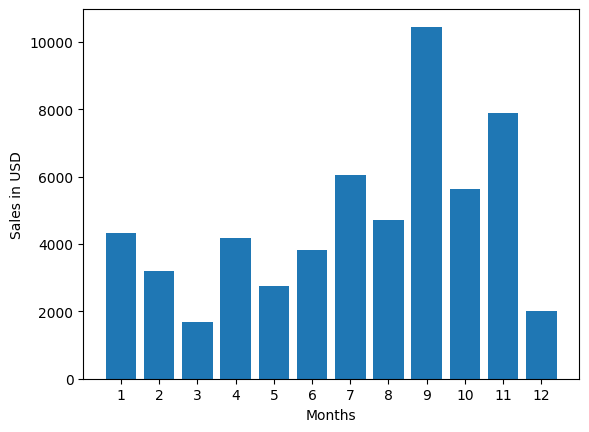

In [24]:
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

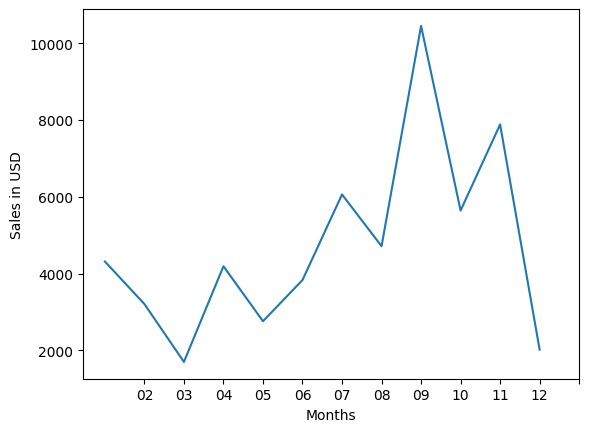

In [284]:
plt.plot(sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

2. What city has the best sales?

In [70]:
df.groupby('City').sum()['Sales']


City
Austin          3366.25
Charlotte       2136.38
Chicago           23.98
Columbus        6996.06
Denver          5614.39
Fort Worth      6429.30
Houston          149.99
Jacksonville    1531.48
LA              6083.04
NYC             3470.23
Phoenix           11.99
San Antonio     1411.25
San Diego       3689.69
San Jose        5219.66
Seattle         4480.82
Name: Sales, dtype: float64

In [78]:
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city

City
Austin          3366.25
Charlotte       2136.38
Chicago           23.98
Columbus        6996.06
Denver          5614.39
Fort Worth      6429.30
Houston          149.99
Jacksonville    1531.48
LA              6083.04
NYC             3470.23
Phoenix           11.99
San Antonio     1411.25
San Diego       3689.69
San Jose        5219.66
Seattle         4480.82
Name: Sales, dtype: float64

In [77]:
cities = [city for city, sales in sales_value_city.items()]
print(cities)

['Austin', 'Charlotte', 'Chicago', 'Columbus', 'Denver', 'Fort Worth', 'Houston', 'Jacksonville', 'LA', 'NYC', 'Phoenix', 'San Antonio', 'San Diego', 'San Jose', 'Seattle']


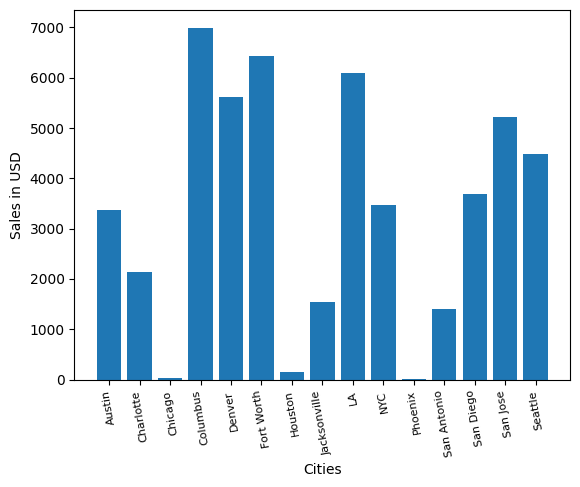

In [76]:
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=100, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

3. Top N ProductID with the highest /lowest sales

In [259]:
df['ProductID'] = df['ProductID'].astype(int)

In [154]:
df['Sales'] = df['ProductID'].astype(float)

In [211]:
store_value = df.groupby('StoreID').sum()['Sales']
store_value_sales = store_value.nlargest(10)
store_value_sales

StoreID
ST02    3091.0
ST04    3051.0
ST11    2815.0
ST15    2763.0
ST01    2757.0
ST06    2726.0
ST13    2714.0
ST03    2699.0
ST12    2515.0
ST05    2421.0
Name: Sales, dtype: float64

In [212]:
StoreId = [StoreID for StoreID, sales in store_value_sales.items()]
StoreId

['ST02',
 'ST04',
 'ST11',
 'ST15',
 'ST01',
 'ST06',
 'ST13',
 'ST03',
 'ST12',
 'ST05']

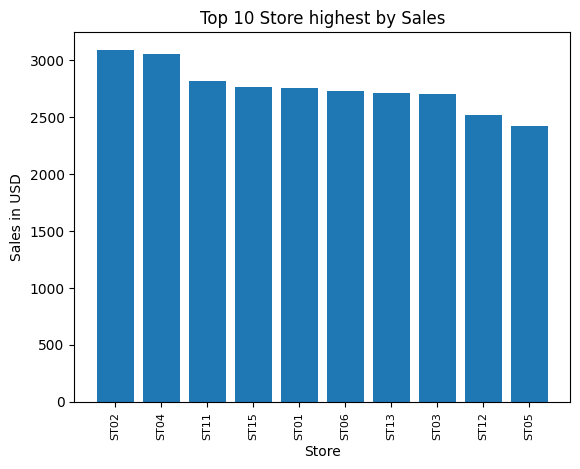

In [260]:
plt.bar(x=StoreId, height=store_value_sales)
plt.xticks(StoreId, rotation=90, size=8 )
plt.title('Top 10 Store highest by Sales')
plt.xlabel('Store')
plt.ylabel('Sales in USD')
plt.show()

4. Top N City by Sales

In [228]:
city_value = df.groupby('City').sum()['Sales']
city_value_sales = city_value.nlargest(4)
city_value_sales

City
Fort Worth    4532.0
Seattle       4438.0
Columbus      4361.0
Charlotte     3925.0
Name: Sales, dtype: float64

In [229]:
City = [City for City, sales in city_value_sales.items()]
City

['Fort Worth', 'Seattle', 'Columbus', 'Charlotte']

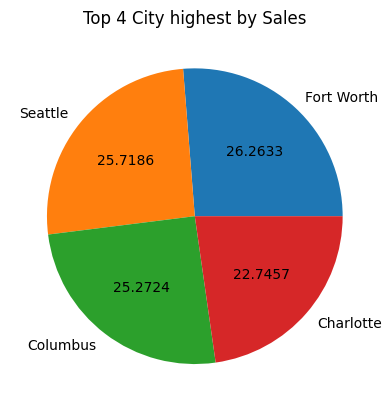

In [258]:
plt.pie(city_value_sales, labels = City, autopct='%.4f')
plt.title('Top 4 City highest by Sales')
plt.show()

In [ ]:
# Thank you so much!